# DALI machine optics

## Mirian 19 Nov 2024

In [765]:
import IPython
import numpy
import time
import scipy
import matplotlib
import ocelot
print('ocelot:', ocelot.__version__)
from __future__ import print_function
# the output of plotting commands is displayed inline within frontends, 
# directly below the code cell that produced it
%matplotlib inline
# import from Ocelot main modules and functions
from ocelot import *
#from Ocelot graphical modules
from ocelot.gui.accelerator import *
#from DALI_lattice import *

ocelot: 24.03.0


In [766]:
from DALI_lattice import *

In [767]:
lat = MagneticLattice(T02T1)

In [768]:
# to see total lenth of the lattice 
print("length of the cell: ", lat.totalLen, "m")

# or, for example, you can get R matrix for whole lattice

B, R, T = lat.transfer_maps(energy=0.005)
#print(R)

length of the cell:  12.313999999999993 m


In [769]:
# initialization of Twiss object
tws0 = Twiss()
# defining initial twiss parameters
tws0.beta_x = 29.171
tws0.beta_y = 29.171
tws0.alpha_x = 10.955
tws0.alpha_y = 10.955
# defining initial electron energy in GeV
tws0.E = 0.005 #  5 mev /// 0.005 Gev 

# calculate optical functions with initial twiss parameters
tws = twiss(lat, tws0, nPoints=None)

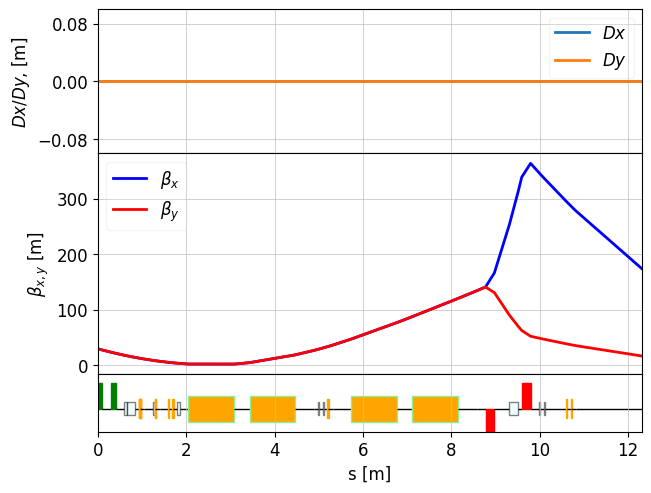

In [770]:
plot_opt_func(lat, tws, top_plot=["Dx", "Dy"],  fig_name="i1", legend=False)
plt.show()

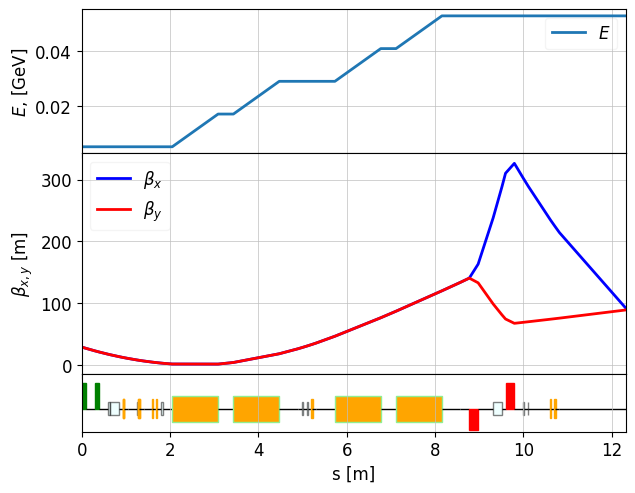

In [57]:
plot_opt_func(lat, tws, top_plot=["E"], fig_name=0, legend=False)
plt.show()

# POSITRON Sourcec 

In [135]:
import math
# deflection angle of dipoles
fl1b_a = 45.0 * math.pi / 180.0
# reference trajectory length through dipoles
fl1b_l = 0.300 * fl1b_a
# edge angles of dipoles
fl1b_e = 11.25 * math.pi / 180.0

print(fl1b_a, fl1b_l,fl1b_e)

0.7853981633974483 0.23561944901923448 0.19634954084936207


length of the cell:  1.791238898038469 m


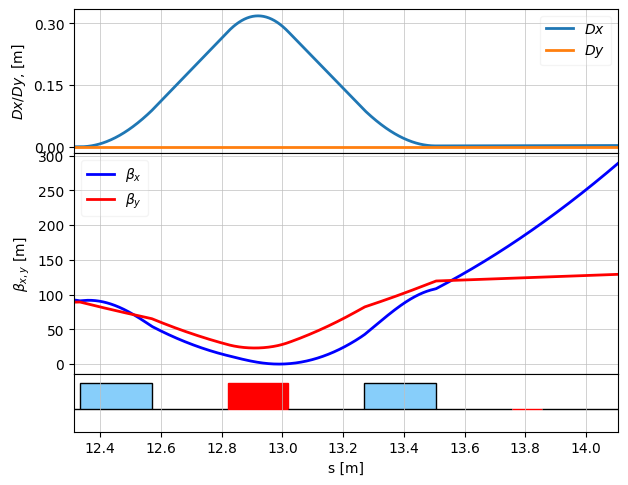

In [163]:
# defining of the drifts
D1 = Drift(l=0.02)
D2 = Drift(l=0.25)
D3 = Drift(l=0.25)
D4= Drift(l=0.25)

# defining of the quads

Q4 = Quadrupole(l=0.2, k1=25)
Q5 = Quadrupole(l=0.1, k1=0)
# defining of the bending magnet
#B = Bend(l=2.7, k1=-.06, angle=2*pi/16., e1=pi/16., e2=pi/16.)
B=SBend(l=fl1b_l, angle=fl1b_a, e1=fl1b_e, e2=fl1b_e, tilt=0.0, fint=0.0, eid='PS_bend')

# defining of the sextupoles

# cell creating
cell = (D1,  B, D2, Q4, D3, B, D4, Q5, D4)

latDB = MagneticLattice(cell)

# to see total lenth of the lattice 
print("length of the cell: ", latDB.totalLen, "m")

# or, for example, you can get R matrix for whole lattice

B, R, T = latDB.transfer_maps(energy=tws[-1].E)
#print(R)
twsDB = twiss(latDB,tws[-1] ,nPoints=1000)


# plot optical functions.
plot_opt_func(latDB, twsDB, top_plot = ["Dx", "Dy"], legend=False, font_size=10)
plt.show()

length of the cell:  14.10523889803846 m


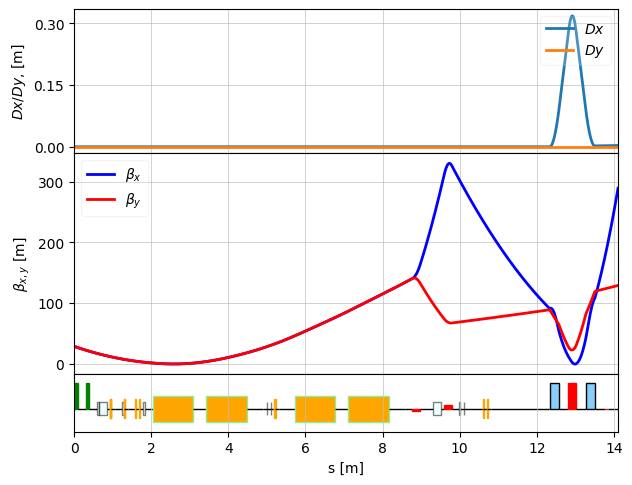

In [137]:
PS_lat=(T02T1, cell)



latPS = MagneticLattice(PS_lat)

# to see total lenth of the lattice 
print("length of the cell: ", latPS.totalLen, "m")

# or, for example, you can get R matrix for whole lattice

B, R, T = latPS.transfer_maps(energy=tws[-1].E)
#print(R)
twsPS = twiss(latPS,tws0 ,nPoints=1000)


# plot optical functions.
plot_opt_func(latPS, twsPS, top_plot = ["Dx", "Dy"], legend=False, font_size=10)
plt.show()

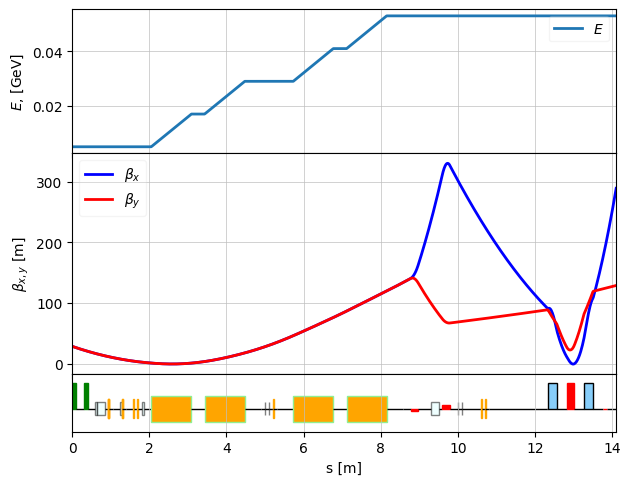

In [164]:
plot_opt_func(latPS, twsPS, top_plot = ["E"], legend=False, font_size=10)
plt.show()